In [1]:
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def do_add(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        try:
            ll[ii_3] = ii_1 + ii_2
        except:
            print((ii_1, ii_2, ii_3))
            print(ll)
    return 4
    
def do_mul(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        ll[ii_3] = ii_1 * ii_2
    return 4

def do_store(ll, ii_1, inp_val, imme_bool):
    if not imme_bool:
        ll[ii_1] = inp_val
    return 2

def do_output(ii_1, verbose):
    if verbose:
        print(ii_1)
    return 2

def jump_if_true(ii_1, ii_2, cur):
    if ii_1:
        return ii_2 
    return cur + 3

def jump_if_false(ii_1, ii_2, cur):
    if not ii_1:
        return ii_2 
    return cur + 3

def do_less_than(ll, ii_1, ii_2, ii_3):
    if ii_1 < ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_equals(ll, ii_1, ii_2, ii_3):
    if ii_1 == ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_adjust_relative_base(ii_1, rel_index, cur):
    return cur + 2, rel_index + ii_1

def set_up_single(jj, ll, cur, rel_index, pos_code=False):   
    # 0: position mode, use value as pointer
    # 1: immediate mode, use value as int
    # 2: relative mode, use value as pointer with offset
    param = str(ll[cur])[:-2]
    if len(param) >=jj and int(param[len(param)-jj]) == 1: # immediate
        return ll[cur+jj], True
    elif len(param) >=jj and int(param[len(param)-jj]) == 2: # relative
        offset = rel_index
    else:
        offset = 0
    if pos_code:
        assert(cur+jj >= 0)
        return ll[cur+jj]+offset, False
    else:
        assert(cur+jj >= 0)
        assert(ll[cur+jj]+offset >= 0)
        return ll[ll[cur+jj]+offset], False

def set_up_inputs_len_3(ll, cur, rel_index):
    ii_3, imme_bool = set_up_single(3, ll, cur, rel_index, pos_code=True)
    ii_2, _ = set_up_single(2, ll, cur, rel_index)
    ii_1, _ = set_up_single(1, ll, cur, rel_index)
    return ii_1, ii_2, ii_3, imme_bool

def get_inp_val(inp_index, inp_val):
    cur_inp_val = inp_val[inp_index]
    return cur_inp_val, inp_index + 1
    
    
def run_computer(ll, inp_val, verbose=True, out_val=[], 
                 cur=0, inp_index=0, rel_index=0):
    # Provide all inputs so computer can be restarted from previous settings
    
    # Extra memory needs to be provided by appending ll before first starting the computer
    
    while ll[cur] % 100 != 99:
        
        if ll[cur] % 100 == 1:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_add(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 2:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_mul(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 3:
            if len(inp_val) <= inp_index: # Wait till other machines have run so input is available
                return [cur, inp_index, rel_index], False
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=True)
            cur_inp_val, inp_index = get_inp_val(inp_index, inp_val)
            cur = cur + do_store(ll, ii_1, cur_inp_val, imme_bool)
        elif ll[cur] % 100 == 4:
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=False)
            last_output = ii_1
            out_val.append(last_output)
            cur = cur + do_output(ii_1, verbose)
        elif ll[cur] % 100 == 5:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_true(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 6:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_false(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 7:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_less_than(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 8:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_equals(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 9:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            cur, rel_index = do_adjust_relative_base(ii_1, rel_index, cur)
        else:
            print(ll)
            raise ValueError
#     return ll
    return last_output, True

In [3]:
# Part one 
Nx = 37
Ny = 26
M = 100

grid = np.zeros((Ny,Nx))
# print(np.shape(grid))

inp_program = [1,380,379,385,1008,2563,747932,381,1005,381,12,99,109,2564,1101,0,0,383,1101,0,0,382,20102,1,382,1,21002,383,1,2,21101,37,0,0,1105,1,578,4,382,4,383,204,1,1001,382,1,382,1007,382,37,381,1005,381,22,1001,383,1,383,1007,383,26,381,1005,381,18,1006,385,69,99,104,-1,104,0,4,386,3,384,1007,384,0,381,1005,381,94,107,0,384,381,1005,381,108,1106,0,161,107,1,392,381,1006,381,161,1102,1,-1,384,1105,1,119,1007,392,35,381,1006,381,161,1101,0,1,384,20101,0,392,1,21102,1,24,2,21101,0,0,3,21102,138,1,0,1105,1,549,1,392,384,392,21001,392,0,1,21102,1,24,2,21102,1,3,3,21101,161,0,0,1106,0,549,1102,1,0,384,20001,388,390,1,21002,389,1,2,21101,180,0,0,1105,1,578,1206,1,213,1208,1,2,381,1006,381,205,20001,388,390,1,20101,0,389,2,21101,205,0,0,1106,0,393,1002,390,-1,390,1101,0,1,384,21001,388,0,1,20001,389,391,2,21101,0,228,0,1105,1,578,1206,1,261,1208,1,2,381,1006,381,253,20102,1,388,1,20001,389,391,2,21101,0,253,0,1106,0,393,1002,391,-1,391,1102,1,1,384,1005,384,161,20001,388,390,1,20001,389,391,2,21101,0,279,0,1105,1,578,1206,1,316,1208,1,2,381,1006,381,304,20001,388,390,1,20001,389,391,2,21101,0,304,0,1106,0,393,1002,390,-1,390,1002,391,-1,391,1101,1,0,384,1005,384,161,21002,388,1,1,20102,1,389,2,21102,0,1,3,21101,0,338,0,1105,1,549,1,388,390,388,1,389,391,389,20102,1,388,1,20101,0,389,2,21101,0,4,3,21101,0,365,0,1105,1,549,1007,389,25,381,1005,381,75,104,-1,104,0,104,0,99,0,1,0,0,0,0,0,0,369,16,21,1,1,18,109,3,22101,0,-2,1,21202,-1,1,2,21102,0,1,3,21101,0,414,0,1105,1,549,21201,-2,0,1,21201,-1,0,2,21102,429,1,0,1105,1,601,1201,1,0,435,1,386,0,386,104,-1,104,0,4,386,1001,387,-1,387,1005,387,451,99,109,-3,2105,1,0,109,8,22202,-7,-6,-3,22201,-3,-5,-3,21202,-4,64,-2,2207,-3,-2,381,1005,381,492,21202,-2,-1,-1,22201,-3,-1,-3,2207,-3,-2,381,1006,381,481,21202,-4,8,-2,2207,-3,-2,381,1005,381,518,21202,-2,-1,-1,22201,-3,-1,-3,2207,-3,-2,381,1006,381,507,2207,-3,-4,381,1005,381,540,21202,-4,-1,-1,22201,-3,-1,-3,2207,-3,-4,381,1006,381,529,21202,-3,1,-7,109,-8,2106,0,0,109,4,1202,-2,37,566,201,-3,566,566,101,639,566,566,1201,-1,0,0,204,-3,204,-2,204,-1,109,-4,2105,1,0,109,3,1202,-1,37,593,201,-2,593,593,101,639,593,593,21001,0,0,-2,109,-3,2106,0,0,109,3,22102,26,-2,1,22201,1,-1,1,21102,1,487,2,21101,0,575,3,21102,1,962,4,21102,1,630,0,1105,1,456,21201,1,1601,-2,109,-3,2105,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,2,2,2,0,2,0,0,0,2,0,2,2,2,2,2,2,0,2,2,2,0,2,0,2,0,2,2,0,2,2,0,2,0,1,1,0,2,0,0,2,0,2,2,2,0,2,2,2,2,2,2,2,2,2,0,2,2,0,2,2,2,2,2,0,2,2,2,0,0,0,1,1,0,2,0,2,2,2,0,0,2,2,2,2,0,2,0,2,0,0,2,2,2,2,2,2,2,0,2,2,0,2,0,0,2,0,0,1,1,0,2,0,2,2,2,2,0,2,2,0,0,0,0,0,2,2,2,2,2,0,0,0,0,0,2,2,2,0,0,2,0,0,2,0,1,1,0,0,2,0,0,0,0,2,0,2,0,2,2,2,2,0,0,2,0,2,2,0,0,2,2,0,2,0,2,2,2,2,0,2,0,1,1,0,2,2,0,2,2,0,0,0,0,0,2,0,2,0,0,2,2,2,0,2,2,0,2,2,2,2,0,2,2,2,2,0,0,0,1,1,0,2,2,2,2,2,2,0,2,0,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,0,0,1,1,0,2,2,2,2,2,0,0,2,0,2,0,2,2,0,0,0,0,2,0,0,2,2,2,2,2,2,0,0,0,2,2,2,0,0,1,1,0,0,2,2,2,2,0,0,2,0,2,2,0,0,0,0,0,0,2,2,2,2,2,2,2,2,0,2,2,2,0,0,0,2,0,1,1,0,2,0,2,2,2,0,2,0,2,2,2,2,0,2,2,2,2,0,0,2,2,0,0,2,0,0,0,2,2,2,2,0,0,0,1,1,0,2,0,2,2,2,2,2,2,2,0,0,2,0,0,2,2,2,0,0,2,2,0,2,0,2,0,2,2,2,2,2,0,2,0,1,1,0,2,2,2,0,2,0,2,2,0,2,2,2,2,2,0,0,0,2,2,0,2,2,0,2,0,0,0,0,2,2,2,0,0,0,1,1,0,2,2,0,0,2,2,2,0,0,2,0,2,2,2,0,0,2,2,2,0,0,2,2,2,2,0,0,0,2,0,2,2,2,0,1,1,0,0,0,0,0,2,2,0,2,2,0,2,2,0,2,2,2,0,0,0,2,2,0,0,2,2,0,2,0,0,2,2,0,2,0,1,1,0,2,0,2,0,2,2,0,0,2,2,0,2,0,2,0,2,2,0,2,0,0,2,2,0,2,2,0,2,2,2,2,2,2,0,1,1,0,2,0,0,2,0,2,2,2,0,2,2,2,2,2,2,0,0,2,0,0,2,2,0,0,2,2,2,2,0,0,2,2,0,0,1,1,0,2,2,2,2,0,2,2,2,0,2,2,2,2,0,0,2,2,2,0,2,0,2,0,2,2,0,2,2,0,0,2,2,0,0,1,1,0,2,2,2,2,2,0,0,0,2,2,2,2,2,2,0,2,2,2,0,2,2,0,2,2,2,2,2,0,0,0,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36,15,49,65,33,64,90,69,80,38,6,11,42,79,20,83,19,67,76,39,23,24,21,94,31,77,25,39,50,66,66,19,40,89,50,59,3,34,57,47,41,75,90,15,29,53,32,72,19,20,88,89,42,54,77,15,96,66,74,77,51,46,71,16,76,96,20,52,26,56,86,80,43,98,91,64,12,86,11,44,14,18,35,40,53,17,44,43,29,69,75,25,8,46,26,18,14,61,89,42,10,21,57,69,13,74,3,68,8,46,35,29,35,79,81,28,30,87,3,67,75,1,95,98,88,18,29,40,28,23,17,5,52,51,5,40,42,89,31,86,67,42,53,43,42,45,63,43,10,46,95,10,26,65,77,38,24,17,30,21,18,25,59,25,72,54,83,34,36,48,60,48,28,3,6,14,92,84,20,31,68,38,16,11,95,36,89,38,69,70,73,49,15,23,70,65,23,11,34,69,6,60,11,38,70,75,18,43,29,53,26,59,95,27,46,3,78,68,7,61,36,20,77,54,43,54,45,26,86,98,21,11,83,60,30,47,46,83,25,74,36,3,54,22,98,70,10,49,35,14,24,38,31,77,95,33,8,17,43,42,93,81,56,13,72,60,18,70,36,64,15,24,49,60,92,47,67,34,24,58,15,96,13,83,55,67,17,43,84,72,55,38,43,90,94,55,11,56,16,8,68,87,14,19,93,6,23,21,41,17,19,13,37,85,69,77,83,91,70,61,5,13,98,87,45,88,13,71,63,98,41,13,81,19,30,34,83,44,70,84,76,22,68,30,55,42,96,1,71,42,32,95,14,33,50,96,61,95,35,18,67,84,7,39,10,95,7,33,69,55,82,19,94,52,60,46,63,62,93,92,39,69,42,60,35,64,69,62,50,29,13,53,90,62,1,45,92,16,89,3,8,81,45,61,88,12,34,27,23,31,73,65,30,43,19,9,44,45,81,17,57,18,3,64,84,70,15,49,34,53,62,58,11,39,90,28,81,61,38,11,96,52,92,71,49,22,69,25,23,4,98,98,3,83,29,70,39,59,79,56,21,45,75,82,48,52,60,44,89,57,42,63,67,30,16,57,26,28,17,65,90,73,22,8,26,72,47,13,68,19,45,45,49,26,20,6,35,65,85,1,59,51,27,13,88,84,63,66,12,78,43,60,79,92,31,44,72,1,18,12,95,6,50,61,66,79,81,21,8,81,33,63,67,31,12,92,48,13,17,27,15,43,45,1,7,58,17,97,45,36,61,28,23,87,97,27,5,97,2,84,30,29,36,60,95,21,97,32,76,78,83,93,28,35,73,26,27,10,90,50,29,24,78,1,71,6,76,44,89,6,94,44,17,80,66,5,43,23,49,52,40,47,39,81,80,80,87,38,26,2,43,97,15,50,79,73,32,73,12,20,53,73,82,7,38,63,78,68,29,96,14,29,52,54,95,6,59,93,98,46,66,91,16,88,95,55,37,2,44,16,97,30,35,19,96,3,8,47,64,4,49,74,89,1,76,90,77,80,46,48,63,11,93,97,71,37,82,75,91,7,33,20,59,8,93,83,83,49,85,92,33,89,58,72,37,27,56,37,91,39,7,52,19,77,20,3,52,57,12,63,14,34,6,89,93,21,62,53,75,3,97,76,75,68,24,83,84,26,66,16,45,46,6,57,48,84,29,1,60,89,63,40,29,63,63,70,10,74,97,94,95,49,55,87,98,2,98,50,93,18,88,39,80,34,41,57,78,12,41,15,13,11,55,22,65,37,21,46,78,17,78,8,62,1,16,9,33,94,26,55,33,22,25,22,93,71,62,82,51,86,66,97,88,82,9,93,9,30,46,37,95,36,21,80,21,36,89,96,44,97,80,42,29,82,87,78,4,58,19,80,95,85,90,64,4,27,65,5,64,71,43,64,92,92,23,80,14,61,12,11,41,12,16,49,93,67,27,68,29,35,66,14,10,46,11,12,79,76,26,62,4,51,35,22,67,83,62,94,95,53,1,94,61,91,5,54,68,24,3,24,98,38,33,78,72,15,9,82,21,59,73,39,23,97,5,13,39,90,61,10,73,92,48,34,47,54,3,54,69,89,67,13,54,41,51,92,51,59,53,76,3,38,93,45,28,10,90,78,40,24,14,58,72,98,19,70,79,18,62,20,79,3,79,73,54,17,10,31,1,70,42,77,747932]
inp_program = inp_program + [0]*M
inp_list = []
out_list = []

run_computer(inp_program, inp_list, verbose=False, out_val=out_list, 
                 cur=0, inp_index=0, rel_index=0)

ii = 0
while(ii + 2 < len(out_list)):
    [x_cor, y_cor, tile_id] = out_list[ii:ii+3]
#     print((x_cor, y_cor))
#     print(np.shape(grid))
    grid[y_cor, x_cor] = tile_id
    ii = ii + 3
    
print('Part one solution: %s' %np.sum(grid == 2))

Part one solution: 369


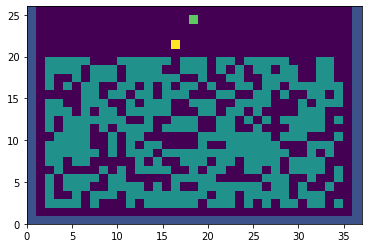

In [4]:
plt.pcolormesh(grid)

In [5]:
# Part two
Nx = 37
Ny = 26
M = 100

grid = np.zeros((Ny,Nx))

inp_program = [2,380,379,385,1008,2563,747932,381,1005,381,12,99,109,2564,1101,0,0,383,1101,0,0,382,20102,1,382,1,21002,383,1,2,21101,37,0,0,1105,1,578,4,382,4,383,204,1,1001,382,1,382,1007,382,37,381,1005,381,22,1001,383,1,383,1007,383,26,381,1005,381,18,1006,385,69,99,104,-1,104,0,4,386,3,384,1007,384,0,381,1005,381,94,107,0,384,381,1005,381,108,1106,0,161,107,1,392,381,1006,381,161,1102,1,-1,384,1105,1,119,1007,392,35,381,1006,381,161,1101,0,1,384,20101,0,392,1,21102,1,24,2,21101,0,0,3,21102,138,1,0,1105,1,549,1,392,384,392,21001,392,0,1,21102,1,24,2,21102,1,3,3,21101,161,0,0,1106,0,549,1102,1,0,384,20001,388,390,1,21002,389,1,2,21101,180,0,0,1105,1,578,1206,1,213,1208,1,2,381,1006,381,205,20001,388,390,1,20101,0,389,2,21101,205,0,0,1106,0,393,1002,390,-1,390,1101,0,1,384,21001,388,0,1,20001,389,391,2,21101,0,228,0,1105,1,578,1206,1,261,1208,1,2,381,1006,381,253,20102,1,388,1,20001,389,391,2,21101,0,253,0,1106,0,393,1002,391,-1,391,1102,1,1,384,1005,384,161,20001,388,390,1,20001,389,391,2,21101,0,279,0,1105,1,578,1206,1,316,1208,1,2,381,1006,381,304,20001,388,390,1,20001,389,391,2,21101,0,304,0,1106,0,393,1002,390,-1,390,1002,391,-1,391,1101,1,0,384,1005,384,161,21002,388,1,1,20102,1,389,2,21102,0,1,3,21101,0,338,0,1105,1,549,1,388,390,388,1,389,391,389,20102,1,388,1,20101,0,389,2,21101,0,4,3,21101,0,365,0,1105,1,549,1007,389,25,381,1005,381,75,104,-1,104,0,104,0,99,0,1,0,0,0,0,0,0,369,16,21,1,1,18,109,3,22101,0,-2,1,21202,-1,1,2,21102,0,1,3,21101,0,414,0,1105,1,549,21201,-2,0,1,21201,-1,0,2,21102,429,1,0,1105,1,601,1201,1,0,435,1,386,0,386,104,-1,104,0,4,386,1001,387,-1,387,1005,387,451,99,109,-3,2105,1,0,109,8,22202,-7,-6,-3,22201,-3,-5,-3,21202,-4,64,-2,2207,-3,-2,381,1005,381,492,21202,-2,-1,-1,22201,-3,-1,-3,2207,-3,-2,381,1006,381,481,21202,-4,8,-2,2207,-3,-2,381,1005,381,518,21202,-2,-1,-1,22201,-3,-1,-3,2207,-3,-2,381,1006,381,507,2207,-3,-4,381,1005,381,540,21202,-4,-1,-1,22201,-3,-1,-3,2207,-3,-4,381,1006,381,529,21202,-3,1,-7,109,-8,2106,0,0,109,4,1202,-2,37,566,201,-3,566,566,101,639,566,566,1201,-1,0,0,204,-3,204,-2,204,-1,109,-4,2105,1,0,109,3,1202,-1,37,593,201,-2,593,593,101,639,593,593,21001,0,0,-2,109,-3,2106,0,0,109,3,22102,26,-2,1,22201,1,-1,1,21102,1,487,2,21101,0,575,3,21102,1,962,4,21102,1,630,0,1105,1,456,21201,1,1601,-2,109,-3,2105,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,2,2,2,0,2,0,0,0,2,0,2,2,2,2,2,2,0,2,2,2,0,2,0,2,0,2,2,0,2,2,0,2,0,1,1,0,2,0,0,2,0,2,2,2,0,2,2,2,2,2,2,2,2,2,0,2,2,0,2,2,2,2,2,0,2,2,2,0,0,0,1,1,0,2,0,2,2,2,0,0,2,2,2,2,0,2,0,2,0,0,2,2,2,2,2,2,2,0,2,2,0,2,0,0,2,0,0,1,1,0,2,0,2,2,2,2,0,2,2,0,0,0,0,0,2,2,2,2,2,0,0,0,0,0,2,2,2,0,0,2,0,0,2,0,1,1,0,0,2,0,0,0,0,2,0,2,0,2,2,2,2,0,0,2,0,2,2,0,0,2,2,0,2,0,2,2,2,2,0,2,0,1,1,0,2,2,0,2,2,0,0,0,0,0,2,0,2,0,0,2,2,2,0,2,2,0,2,2,2,2,0,2,2,2,2,0,0,0,1,1,0,2,2,2,2,2,2,0,2,0,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,0,0,1,1,0,2,2,2,2,2,0,0,2,0,2,0,2,2,0,0,0,0,2,0,0,2,2,2,2,2,2,0,0,0,2,2,2,0,0,1,1,0,0,2,2,2,2,0,0,2,0,2,2,0,0,0,0,0,0,2,2,2,2,2,2,2,2,0,2,2,2,0,0,0,2,0,1,1,0,2,0,2,2,2,0,2,0,2,2,2,2,0,2,2,2,2,0,0,2,2,0,0,2,0,0,0,2,2,2,2,0,0,0,1,1,0,2,0,2,2,2,2,2,2,2,0,0,2,0,0,2,2,2,0,0,2,2,0,2,0,2,0,2,2,2,2,2,0,2,0,1,1,0,2,2,2,0,2,0,2,2,0,2,2,2,2,2,0,0,0,2,2,0,2,2,0,2,0,0,0,0,2,2,2,0,0,0,1,1,0,2,2,0,0,2,2,2,0,0,2,0,2,2,2,0,0,2,2,2,0,0,2,2,2,2,0,0,0,2,0,2,2,2,0,1,1,0,0,0,0,0,2,2,0,2,2,0,2,2,0,2,2,2,0,0,0,2,2,0,0,2,2,0,2,0,0,2,2,0,2,0,1,1,0,2,0,2,0,2,2,0,0,2,2,0,2,0,2,0,2,2,0,2,0,0,2,2,0,2,2,0,2,2,2,2,2,2,0,1,1,0,2,0,0,2,0,2,2,2,0,2,2,2,2,2,2,0,0,2,0,0,2,2,0,0,2,2,2,2,0,0,2,2,0,0,1,1,0,2,2,2,2,0,2,2,2,0,2,2,2,2,0,0,2,2,2,0,2,0,2,0,2,2,0,2,2,0,0,2,2,0,0,1,1,0,2,2,2,2,2,0,0,0,2,2,2,2,2,2,0,2,2,2,0,2,2,0,2,2,2,2,2,0,0,0,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36,15,49,65,33,64,90,69,80,38,6,11,42,79,20,83,19,67,76,39,23,24,21,94,31,77,25,39,50,66,66,19,40,89,50,59,3,34,57,47,41,75,90,15,29,53,32,72,19,20,88,89,42,54,77,15,96,66,74,77,51,46,71,16,76,96,20,52,26,56,86,80,43,98,91,64,12,86,11,44,14,18,35,40,53,17,44,43,29,69,75,25,8,46,26,18,14,61,89,42,10,21,57,69,13,74,3,68,8,46,35,29,35,79,81,28,30,87,3,67,75,1,95,98,88,18,29,40,28,23,17,5,52,51,5,40,42,89,31,86,67,42,53,43,42,45,63,43,10,46,95,10,26,65,77,38,24,17,30,21,18,25,59,25,72,54,83,34,36,48,60,48,28,3,6,14,92,84,20,31,68,38,16,11,95,36,89,38,69,70,73,49,15,23,70,65,23,11,34,69,6,60,11,38,70,75,18,43,29,53,26,59,95,27,46,3,78,68,7,61,36,20,77,54,43,54,45,26,86,98,21,11,83,60,30,47,46,83,25,74,36,3,54,22,98,70,10,49,35,14,24,38,31,77,95,33,8,17,43,42,93,81,56,13,72,60,18,70,36,64,15,24,49,60,92,47,67,34,24,58,15,96,13,83,55,67,17,43,84,72,55,38,43,90,94,55,11,56,16,8,68,87,14,19,93,6,23,21,41,17,19,13,37,85,69,77,83,91,70,61,5,13,98,87,45,88,13,71,63,98,41,13,81,19,30,34,83,44,70,84,76,22,68,30,55,42,96,1,71,42,32,95,14,33,50,96,61,95,35,18,67,84,7,39,10,95,7,33,69,55,82,19,94,52,60,46,63,62,93,92,39,69,42,60,35,64,69,62,50,29,13,53,90,62,1,45,92,16,89,3,8,81,45,61,88,12,34,27,23,31,73,65,30,43,19,9,44,45,81,17,57,18,3,64,84,70,15,49,34,53,62,58,11,39,90,28,81,61,38,11,96,52,92,71,49,22,69,25,23,4,98,98,3,83,29,70,39,59,79,56,21,45,75,82,48,52,60,44,89,57,42,63,67,30,16,57,26,28,17,65,90,73,22,8,26,72,47,13,68,19,45,45,49,26,20,6,35,65,85,1,59,51,27,13,88,84,63,66,12,78,43,60,79,92,31,44,72,1,18,12,95,6,50,61,66,79,81,21,8,81,33,63,67,31,12,92,48,13,17,27,15,43,45,1,7,58,17,97,45,36,61,28,23,87,97,27,5,97,2,84,30,29,36,60,95,21,97,32,76,78,83,93,28,35,73,26,27,10,90,50,29,24,78,1,71,6,76,44,89,6,94,44,17,80,66,5,43,23,49,52,40,47,39,81,80,80,87,38,26,2,43,97,15,50,79,73,32,73,12,20,53,73,82,7,38,63,78,68,29,96,14,29,52,54,95,6,59,93,98,46,66,91,16,88,95,55,37,2,44,16,97,30,35,19,96,3,8,47,64,4,49,74,89,1,76,90,77,80,46,48,63,11,93,97,71,37,82,75,91,7,33,20,59,8,93,83,83,49,85,92,33,89,58,72,37,27,56,37,91,39,7,52,19,77,20,3,52,57,12,63,14,34,6,89,93,21,62,53,75,3,97,76,75,68,24,83,84,26,66,16,45,46,6,57,48,84,29,1,60,89,63,40,29,63,63,70,10,74,97,94,95,49,55,87,98,2,98,50,93,18,88,39,80,34,41,57,78,12,41,15,13,11,55,22,65,37,21,46,78,17,78,8,62,1,16,9,33,94,26,55,33,22,25,22,93,71,62,82,51,86,66,97,88,82,9,93,9,30,46,37,95,36,21,80,21,36,89,96,44,97,80,42,29,82,87,78,4,58,19,80,95,85,90,64,4,27,65,5,64,71,43,64,92,92,23,80,14,61,12,11,41,12,16,49,93,67,27,68,29,35,66,14,10,46,11,12,79,76,26,62,4,51,35,22,67,83,62,94,95,53,1,94,61,91,5,54,68,24,3,24,98,38,33,78,72,15,9,82,21,59,73,39,23,97,5,13,39,90,61,10,73,92,48,34,47,54,3,54,69,89,67,13,54,41,51,92,51,59,53,76,3,38,93,45,28,10,90,78,40,24,14,58,72,98,19,70,79,18,62,20,79,3,79,73,54,17,10,31,1,70,42,77,747932]
inp_program = inp_program + [0]*M

inp_list = []
out_list = []
ii = 0
jj = 0
raw_out = [0, 0, 0]
halted = False
while(jj < 1000 and not halted):
    [cur, inp_index, rel_index] = raw_out
    raw_out, halted = run_computer(inp_program, inp_list, verbose=False, out_val=out_list, 
                     cur=cur, inp_index=inp_index, rel_index=rel_index)

    while(ii + 2 < len(out_list)):
        [x_cor, y_cor, tile_id] = out_list[ii:ii+3]
        if [x_cor, y_cor] == [-1, 0]:  # Print score
            print('Score: %s' %tile_id)
            jj = jj + 1
        else: # Update grid
            grid[y_cor, x_cor] = tile_id
            
        ii = ii + 3 # Output iterator 
#     ball_coord_yy = np.max(np.argmax(grid == 4, 0)) ## y coordinates not necessary
    ball_coord_xx = np.max(np.argmax(grid == 4, 1))

#     padd_coord_yy = np.max(np.argmax(grid == 3, 0)) ## y coordinates not necessary
    padd_coord_xx = np.max(np.argmax(grid == 3, 1))
    
    if ball_coord_xx > padd_coord_xx: # If the ball is to the right, move right
        inp_list.append(1)
    elif ball_coord_xx < padd_coord_xx: # If the ball is to the left, move left
        inp_list.append(-1)
    else: # If the ball is below the ball, don't move
        inp_list.append(0)
    
if halted:
    print('Final score above')
#     

Score: 0
Score: 49
Score: 77
Score: 94
Score: 110
Score: 123
Score: 126
Score: 161
Score: 173
Score: 266
Score: 283
Score: 320
Score: 336
Score: 425
Score: 450
Score: 530
Score: 612
Score: 621
Score: 716
Score: 752
Score: 777
Score: 867
Score: 880
Score: 918
Score: 922
Score: 991
Score: 1080
Score: 1137
Score: 1149
Score: 1178
Score: 1257
Score: 1281
Score: 1351
Score: 1389
Score: 1408
Score: 1450
Score: 1504
Score: 1566
Score: 1596
Score: 1662
Score: 1679
Score: 1748
Score: 1803
Score: 1873
Score: 1889
Score: 1915
Score: 1929
Score: 1985
Score: 2005
Score: 2047
Score: 2130
Score: 2181
Score: 2183
Score: 2236
Score: 2334
Score: 2432
Score: 2526
Score: 2590
Score: 2658
Score: 2682
Score: 2721
Score: 2811
Score: 2826
Score: 2863
Score: 2947
Score: 3031
Score: 3094
Score: 3134
Score: 3223
Score: 3296
Score: 3351
Score: 3403
Score: 3473
Score: 3571
Score: 3588
Score: 3610
Score: 3690
Score: 3734
Score: 3775
Score: 3813
Score: 3825
Score: 3863
Score: 3884
Score: 3916
Score: 3988
Score: 4053

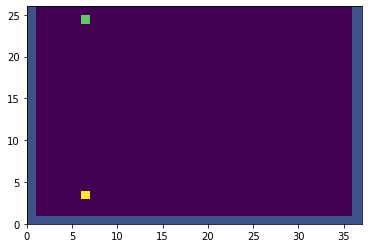

In [6]:
plt.pcolormesh(grid)